In [1]:
import pandas as pd

# Load the dataset
data = pd.read_excel(r"C:\Users\omkar\OneDrive\Pictures\Weather_dataset (1).xlsx")

# Display the first few rows of the dataset
print(data.head())

# Preprocessing
data['Date'] = pd.to_datetime(data['Date'])

# Select features and target
features = data[['Min Temperature', 'Max Temperature', 'Wind speed', 'Date']]
target = data['Average Temp']

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a model pipeline
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'MAE: {mae}, MSE: {mse}')

        Date  Min Temperature  Max Temperature             Description  \
0 2023-08-01               25               29  Moderate or heavy rain   
1 2023-08-02               24               28  Moderate or heavy rain   
2 2023-08-03               23               25  Moderate or heavy rain   
3 2023-08-04               23               27    Patchy rain possible   
4 2023-08-05               23               31    Patchy rain possible   

   Wind speed  Average Temp  
0       16.75          27.0  
1       16.75          26.0  
2       21.00          24.0  
3       17.12          25.0  
4       16.62          27.0  


DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.DateTime64DType'>)

        Date  Min Temperature  Max Temperature             Description  \
0 2023-08-01               25               29  Moderate or heavy rain   
1 2023-08-02               24               28  Moderate or heavy rain   
2 2023-08-03               23               25  Moderate or heavy rain   
3 2023-08-04               23               27    Patchy rain possible   
4 2023-08-05               23               31    Patchy rain possible   

   Wind speed  Average Temp  
0       16.75          27.0  
1       16.75          26.0  
2       21.00          24.0  
3       17.12          25.0  
4       16.62          27.0  
MAE: 0.15083333333333332, MSE: 0.06772638888888881


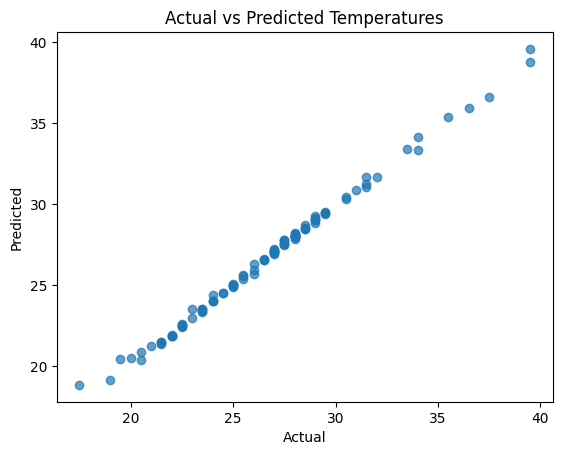

Max Temperature    0.643167
Min Temperature    0.348184
Month              0.003352
Day                0.002651
Wind speed         0.002508
Year               0.000137
dtype: float64


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
data = pd.read_excel(r"C:\Users\omkar\OneDrive\Pictures\Weather_dataset (1).xlsx")

# Display the first few rows of the dataset
print(data.head())

# Preprocessing
data['Date'] = pd.to_datetime(data['Date'])

# Extract numeric features from the Date column
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Select features and target
features = data[['Min Temperature', 'Max Temperature', 'Wind speed', 'Year', 'Month', 'Day']]
target = data['Average Temp']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a model pipeline
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'MAE: {mae}, MSE: {mse}')
import matplotlib.pyplot as plt
plt.scatter( y_test, y_pred, alpha=0.7)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Temperatures')
plt.show()

feature_importances = pd.Series(model.feature_importances_, index=features.columns)
print(feature_importances.sort_values(ascending=False))


In [6]:
model.score(X_train,y_train)

0.9975485226854994

In [3]:
import matplotlib.pyplot as plt
plt.scatter( y_test, y_pred, alpha=0.7)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Temperatures')
plt.show()


NameError: name 'y_test' is not defined

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from tkinter import Tk, Label, Entry, Button, messagebox

# Load the dataset
data = pd.read_excel(r"C:\Users\omkar\OneDrive\Pictures\Weather_dataset (1).xlsx")

# Preprocessing
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Select features and target
features = data[['Min Temperature', 'Max Temperature', 'Wind speed', 'Year', 'Month', 'Day']]
target = data['Average Temp']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# GUI Functionality
def predict_temperature():
    try:
        # Get inputs from user
        min_temp = float(min_temp_entry.get())
        max_temp = float(max_temp_entry.get())
        wind_speed = float(wind_speed_entry.get())
        year = int(year_entry.get())
        month = int(month_entry.get())
        day = int(day_entry.get())

        # Make prediction
        input_features = [[min_temp, max_temp, wind_speed, year, month, day]]
        predicted_temp = model.predict(input_features)[0]
        messagebox.showinfo("Prediction", f"Predicted Average Temperature: {predicted_temp:.2f}°C")
    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numerical values.")

# Create GUI
root = Tk()
root.title("Weather Prediction")

# Labels and Entries
Label(root, text="Min Temperature:").grid(row=0, column=0, padx=10, pady=5)
min_temp_entry = Entry(root)
min_temp_entry.grid(row=0, column=1, padx=10, pady=5)

Label(root, text="Max Temperature:").grid(row=1, column=0, padx=10, pady=5)
max_temp_entry = Entry(root)
max_temp_entry.grid(row=1, column=1, padx=10, pady=5)

Label(root, text="Wind Speed:").grid(row=2, column=0, padx=10, pady=5)
wind_speed_entry = Entry(root)
wind_speed_entry.grid(row=2, column=1, padx=10, pady=5)

Label(root, text="Year:").grid(row=3, column=0, padx=10, pady=5)
year_entry = Entry(root)
year_entry.grid(row=3, column=1, padx=10, pady=5)

Label(root, text="Month:").grid(row=4, column=0, padx=10, pady=5)
month_entry = Entry(root)
month_entry.grid(row=4, column=1, padx=10, pady=5)

Label(root, text="Day:").grid(row=5, column=0, padx=10, pady=5)
day_entry = Entry(root)
day_entry.grid(row=5, column=1, padx=10, pady=5)

# Predict Button
Button(root, text="Predict", command=predict_temperature).grid(row=6, column=0, columnspan=2, pady=20)

# Run the GUI
root.mainloop()


C:\Users\omkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\omkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\omkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
